<a href="https://colab.research.google.com/github/deepakkumar639721/assignment1/blob/main/Makeathon.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [122]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn import metrics
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression

import warnings
warnings.filterwarnings('ignore')

In [123]:
dframe = pd.read_csv('train.csv')
dframe.head()
#we have use head function to get idea about dataset

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [124]:
dframe.isnull().sum()
# It gives the number of null values in each column

PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64

In [125]:
# passengers who are in CryoSleep(A deep sleep during which the body is stored at very cold temperature, to preserve it)
#so they can not spend money on the sevices available
# therefore values in columns (roomservice ,foodcourt,shopping mall, spa ,VRdeck) will always be 0.
# we can update the values of columns to 0 where cryosleep is equal to true.

columns_between = dframe.loc[:,'RoomService':'VRDeck'].columns
var1 = dframe['CryoSleep'] == True
var2 = dframe['CryoSleep'] == False
dframe.loc[var1, columns_between] = 0.0


In [126]:
dframe.groupby('VIP')[columns_between].mean()
# here we can see that vip people expenditure on different services are almost more that double than non vip people


,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
VIP,,,,,
False,215.466764,422.846671,171.858678,299.385933,280.606929
True,473.615385,1802.056701,247.726804,756.868687,1228.556122


In [127]:
# as per the resulted relation between VIP people and their expenditure, 
# we are going to fill null values in columns (roomservice ,foodcourt,shopping mall, spa ,VRdeck) accordingly.

for iterator in columns_between:
	for val in [False,True]:
		dumy = dframe['VIP'] == val
		res1 = dframe[dumy].mean()
		dframe.loc[dumy, iterator] = dframe.loc[dumy, iterator].fillna(res1)


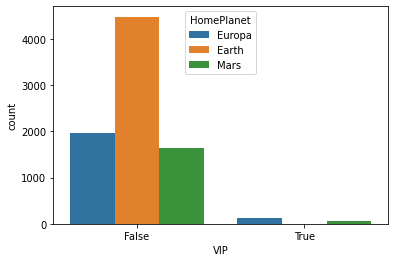

In [128]:
sb.countplot(data=dframe, x='VIP',
			hue='HomePlanet')
plt.show()

# here we can see that most NON_VIP people are from Earth and VIP people are from Europa

In [129]:
# Therefore we can update null values in the column HomePlanet accordingly.
column1 = 'HomePlanet'
dumy2 = dframe['VIP'] == False
dframe.loc[dumy2, column1] = dframe.loc[dumy2, column1].fillna('Earth')

dumy2 = dframe['VIP'] == True
dframe.loc[dumy2, column1] = dframe.loc[dumy2, column1].fillna('Europa')


In [130]:
dframe.isnull().sum()
#here we can see that null-value count of many columns is decreased

PassengerId       0
HomePlanet        3
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     113
FoodCourt       113
ShoppingMall    112
Spa             118
VRDeck          126
Name            200
Transported       0
dtype: int64

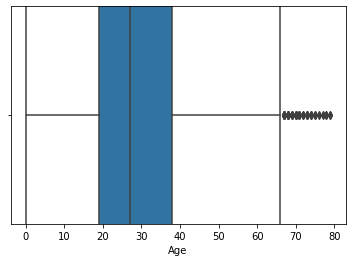

In [131]:
#draw bloxplot to check outliers
sb.boxplot(dframe['Age'],width = 5)
plt.show()

In [135]:
# after checking outliers we are replacing null values in age with their mean
var3 = dframe[dframe['Age'] < 61]['Age'].mean()
var4= dframe[dframe['Age'] < 61]['Age'].mode()
dframe['Age'] = dframe['Age'].fillna(var3)


In [136]:
#From Here we have started data preprocessing
#It can also be used to transform non-numerical labels  to numerical labels.
from sklearn.preprocessing import LabelEncoder
LE=LabelEncoder()

In [137]:
for column_name in dframe.columns:
    if dframe[column_name].dtype == object:
        dframe[column_name] = dframe[column_name].astype(str)
        d1=dframe[column_name].unique()
        d2=d1[-2]
        
        dframe[column_name]=dframe[column_name].fillna(d2)
        dframe[column_name]=LE.fit_transform(dframe[column_name])
    elif dframe[column_name].dtype == float or dframe[column_name].dtype == int:
        m1=dframe[column_name].mean()
        m1=round(m1)
        dframe[column_name]=dframe[column_name].fillna(m1)
        
print(dframe)

      PassengerId  HomePlanet  CryoSleep  Cabin  Destination   Age  VIP  \
0               0           1          0    149            2  39.0    0   
1               1           0          0   2184            2  24.0    0   
2               2           1          0      1            2  58.0    1   
3               3           1          0      1            2  33.0    0   
4               4           0          0   2186            2  16.0    0   
...           ...         ...        ...    ...          ...   ...  ...   
8688         8688           1          0    146            0  41.0    1   
8689         8689           0          1   5280            1  18.0    0   
8690         8690           0          0   5285            2  26.0    0   
8691         8691           1          0   2131            0  32.0    0   
8692         8692           1          0   2131            2  44.0    0   

      RoomService  FoodCourt  ShoppingMall     Spa  VRDeck  Name  Transported  
0             0.0  

In [138]:
dframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   int64  
 1   HomePlanet    8693 non-null   int64  
 2   CryoSleep     8693 non-null   int64  
 3   Cabin         8693 non-null   int64  
 4   Destination   8693 non-null   int64  
 5   Age           8693 non-null   float64
 6   VIP           8693 non-null   int64  
 7   RoomService   8693 non-null   float64
 8   FoodCourt     8693 non-null   float64
 9   ShoppingMall  8693 non-null   float64
 10  Spa           8693 non-null   float64
 11  VRDeck        8693 non-null   float64
 12  Name          8693 non-null   int64  
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), int64(7)
memory usage: 891.5 KB


In [139]:
dframe['Transported']=LE.fit_transform(dframe['Transported'])
# Transported column data type is bool , so we have to convert it into int 
# therefore we have to fit this column 

In [140]:
dframe["Transported"]

0       0
1       1
2       0
3       0
4       1
       ..
8688    0
8689    0
8690    1
8691    0
8692    1
Name: Transported, Length: 8693, dtype: int64

In [141]:
a=dframe.iloc[:,:-1].values
b=dframe.iloc[:,-1].values

In [142]:
from sklearn.preprocessing import StandardScaler
stard=StandardScaler()
a=stard.fit_transform(a)

In [143]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(a,b,test_size=0.2,random_state=30)

In [144]:
from sklearn.linear_model import LogisticRegression 
log=LogisticRegression()
log.fit(x_train,y_train)
y_pred=log.predict(x_test)
y_pred

from sklearn.metrics import accuracy_score
ac=accuracy_score(y_test,y_pred)*100
ac

79.58596894767108

In [145]:
from sklearn.svm import SVC
svc=SVC(kernel='linear',random_state=13)
svc.fit(x_train,y_train)

svm_pred=svc.predict(x_test)
print(svm_pred)

from sklearn.metrics import accuracy_score
ac1=accuracy_score(y_test,svm_pred)*100
ac1

[0 1 1 ... 1 0 1]


80.67855089131685

In [146]:
from sklearn.ensemble import RandomForestRegressor
  
 # create regressor object
regressor = RandomForestRegressor(n_estimators = 100, random_state = 0)
  
# fit the regressor with x and y data
regressor.fit(x_train,y_train)

reg_pred=regressor.predict(x_test)

from sklearn.metrics import roc_auc_score as ras
ras(y_test,reg_pred)*100



87.54876721781365

In [147]:
from sklearn.ensemble import GradientBoostingClassifier
Gradient=GradientBoostingClassifier(n_estimators = 100, random_state = 0)
Gradient.fit(x_train,y_train)
g_pred=Gradient.predict(x_test)

from sklearn.metrics import roc_auc_score as ras
ras(y_test,g_pred)*100

80.59787945539955

In [148]:
# now we are using test data 
testframe = pd.read_csv('test.csv')

In [149]:
#From Here we have started data preprocessing
#It can also be used to transform non-numerical labels  to numerical labels.
from sklearn.preprocessing import LabelEncoder
l1=LabelEncoder()

In [150]:
for colx in testframe.columns:
    if testframe[colx].dtype == object:
        testframe[colx] = testframe[colx].astype(str)
        d1=testframe[colx].unique()
        d2=d1[-2]
        
        testframe[colx]=testframe[colx].fillna(d2)
        testframe[colx]=l1.fit_transform(testframe[colx])
    elif testframe[colx].dtype == float or testframe[colx].dtype == int:
        m1=testframe[colx].mean()
        m1=round(m1)
        testframe[colx]=testframe[colx].fillna(m1)

In [151]:
test_std=testframe.iloc[:,:].values
test_std=stard.fit_transform(test_std)
test_std

array([[-1.73164589, -0.83894716,  1.11673669, ..., -0.27455661,
        -0.25156494,  0.63382323],
       [-1.73083595, -0.83894716, -0.75852158, ...,  2.28300893,
        -0.25156494,  0.22269829],
       [-1.73002601,  0.31369563,  1.11673669, ..., -0.27455661,
        -0.25156494,  1.01082317],
       ...,
       [ 1.73002601,  1.46633842,  1.11673669, ..., -0.27455661,
        -0.25156494, -0.03811417],
       [ 1.73083595,  0.31369563, -0.75852158, ..., -0.27455661,
         0.1718722 ,  0.1585108 ],
       [ 1.73164589, -0.83894716,  1.11673669, ..., -0.27455661,
        -0.25156494,  0.24951079]])

In [152]:
from sklearn.ensemble import RandomForestRegressor
  
 # create regressor object
regressor1 = RandomForestRegressor(n_estimators = 100, random_state = 0)
  
# fit the regressor with x and y data
regressor1.fit(x_train,y_train)

reg_pred1=regressor1.predict(test_std)
reg_pred1

array([0.39, 0.31, 0.99, ..., 0.99, 0.81, 0.21])

In [153]:
final=[]
for x in reg_pred1:
    if x==0:
        final.append(False)
    else:
        final.append(True)

In [154]:
dataset1=pd.read_csv("test.csv")
dataset1.insert(1,"Transported",final)
output=dataset1.iloc[:,[0,1]]
output

,PassengerId,Transported
0,0013_01,True
1,0018_01,True
2,0019_01,True
3,0021_01,True
4,0023_01,True
...,...,...
4272,9266_02,True
4273,9269_01,True
4274,9271_01,True
4275,9273_01,True


In [155]:
s=regressor1.predict([[-1.73164589, -0.83894716,  1.11673669,  1.15821732,  0.55883056,
       -0.11873947, -0.19167756, -0.36477105, -0.29134363, -0.31984696,
       -0.27455661, -0.25156494,  0.63382323]])
if s==0:
  s='false'
else:
  s='true'
s



'true'

In [157]:
import os
output.to_csv('final_submission.csv',index=False)
